In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import spacy
nlp = spacy.load('en_core_web_sm')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [50]:
df = pd.read_csv("train.csv")

In [51]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [57]:

def preprocess_text(text):
    stop_words = set(stopwords.words('french'))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and len(word) > 2 and word not in stop_words]
    return tokens

In [58]:
df = pd.read_csv('train.csv')
df['processed_tokens'] = df['text'].apply(preprocess_text)

In [59]:
corpus = [' '.join(tokens) for tokens in df['processed_tokens']]
corpus_text = ' '.join(corpus)

In [60]:
unique_tokens = set(word_tokenize(corpus_text))
print("Nombre de tokens uniques :", len(unique_tokens))

Nombre de tokens uniques : 14735


In [61]:
max_features = 500
vectorizer = CountVectorizer(max_features=max_features)
X = vectorizer.fit_transform(corpus)
reduced_vocab_tokens = vectorizer.get_feature_names_out()

In [65]:
tokens_freq = pd.Series(vectorizer.vocabulary_).sort_values()
unique_tokens_count = sum(tokens_freq == 1)
print("Nombre de tokens présents une seule fois :", unique_tokens_count)


Nombre de tokens présents une seule fois : 1


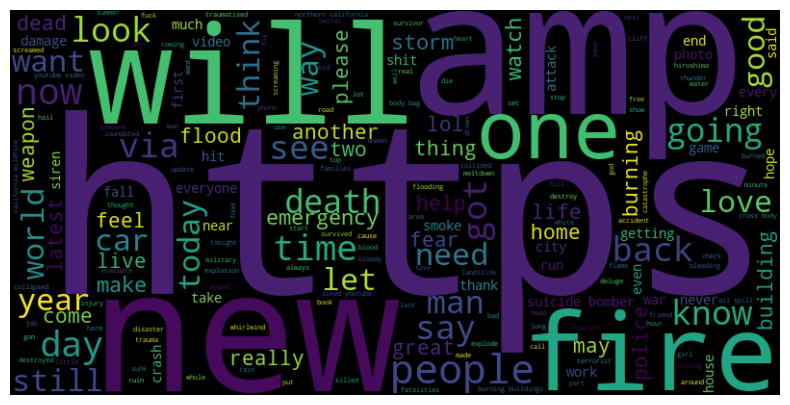

In [66]:
wordcloud = WordCloud(width=800, height=400, random_state=42).generate(corpus_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()